# HeartRate Analyzer

- Heartbeat Sounds Source: https://www.kaggle.com/kinguistics/heartbeat-sounds/data?select=set_a_timing.csv
- Script takes in .wav files, calculates the number of heartbeats in the audio file
- Note - this analyzer has a tendency to overshoot the heartrate
- To Do: Play around with distance/threshold for optimum results

### Stage 1: Testing/Developing Algorithm
- Skip this stage if automation is needed. The code in this stage is useful for debugging, plotting, and confirming the performance of the algorithm.

In [1]:
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import find_peaks
import numpy as np
from playsound import playsound

# Read the Audio File
path = "set_a\\normal__201106111136.wav"
sample_rate, samples = wavfile.read(path)

#Play the sound
playsound(path)

# Get the duration of the audio file 
time = len(samples)/sample_rate

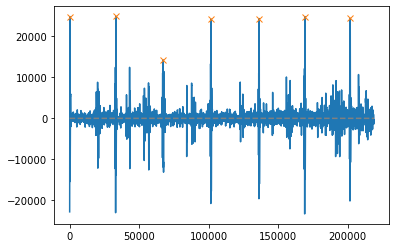

In [2]:
# Determining Best Parameters
peaks, properties = find_peaks(samples, height=0, distance = sample_rate/2)
prom = max(properties["peak_heights"])

# Find peaks of the sample (heartbeats) and their respective properties
peaks, properties = find_peaks(samples, height=0, distance = sample_rate/2,  prominence = prom/3)

#Plot the results
plt.plot(samples)
plt.plot(peaks, samples[peaks], "x") #x marks the peaks
plt.plot(np.zeros_like(samples), "--", color="gray")
plt.show()

In [3]:
#Calculating BPM
bpm = len(peaks)*60/time
bpm

84.61281937661887

### Stage Two: Automated BPM Calculator
- Calculates bpm for all files in a specified folder an saves as and .xlsx file.

In [4]:
def hr_analysis(path):
    sample_rate, samples = wavfile.read(path)

    # Get the duration of the audio file
    time = len(samples)/sample_rate
    
    peaks, properties = find_peaks(samples, height=0, distance = sample_rate/2)
    prom = max(properties["peak_heights"])
    peaks, properties = find_peaks(samples, height=0, distance = sample_rate/2,  prominence = prom/3)

    
    bpm = len(peaks)*60/time
    return bpm, len(peaks)

In [5]:
def heart_df(set_files,col_names,d_list): #Creates tabular data of sound file features for each sound file
    files = os.listdir(set_files) 
    outcome = []
    for file in files:
       
        temp = file.split('__')[0]
        outcome.append(temp)
    return pd.DataFrame(list(zip(outcome,files)),columns=col_names)


In [6]:
import os,fnmatch
import pandas as pd
import librosa
import numpy as np
music_folders="set_a"

col_names =["outcome","file"]
    
outcomes=["normal","artifact","murmur"] 

feature_df= heart_df(music_folders,col_names,outcomes)

In [7]:
feature_df

,outcome,file
0,artifact,artifact__201012172012.wav
1,artifact,artifact__201105040918.wav
2,artifact,artifact__201105041959.wav
3,artifact,artifact__201105051017.wav
4,artifact,artifact__201105060108.wav
...,...,...
171,normal,normal__201106221450.wav
172,normal,normal__201108011112.wav
173,normal,normal__201108011114.wav
174,normal,normal__201108011115.wav


In [8]:
hr = [hr_analysis(str(music_folders + "\\" + file))[0] for file in os.listdir(music_folders)]
peaks = [hr_analysis(str(music_folders + "\\" + file))[1] for file in os.listdir(music_folders)]

In [9]:
feature_df["bpm"]= hr
feature_df['beats'] = peaks

In [10]:
feature_df

,outcome,file,bpm,beats
0,artifact,artifact__201012172012.wav,13.333333,2
1,artifact,artifact__201105040918.wav,26.666667,4
2,artifact,artifact__201105041959.wav,46.666667,7
3,artifact,artifact__201105051017.wav,26.666667,4
4,artifact,artifact__201105060108.wav,33.333333,5
...,...,...,...,...
171,normal,normal__201106221450.wav,73.333333,11
172,normal,normal__201108011112.wav,68.048166,9
173,normal,normal__201108011114.wav,60.487258,8
174,normal,normal__201108011115.wav,83.169980,11


In [11]:
feature_df.to_excel("bpm.xlsx")  